<a href="https://colab.research.google.com/github/Location-Artistry/ColabNotebooks/blob/master/paDataPyMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Working Notebook for visualizing in GeoPandas
Edited Sep 7th - GeoPandas can directly load GeoJSON from url, does not work with regular JSON   
Working to flatten/normalize nested json with Pandas/GeoPandas   
Additionally bring in ArcGIS Feature Service as DataFrame/GeoDataFrame

In [ ]:
%%time 
!apt update
!apt upgrade
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
!pip install pygeos
!pip install flatten_json 

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium
import os
from IPython.display import display
from pandas.io.json import json_normalize
from flatten_json import flatten 
import requests

/usr/local/lib/python3.6/dist-packages/geopandas/_compat.py:87: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


#Start Working Section

##9-8-2020
Working successfully to bring in miCounties GeoJSON as gdf and parse NHBPpa   
data from json - > dataFrame -> add geomtery from lat.long->create gdf


In [3]:
def GeoJSONtoGDF(jsonURL):
  geoDF = gpd.read_file(jsonURL)
  display(geoDF.head())
  return geoDF

In [ ]:
NHBPpa = 'https://purpleairwidget.firebaseapp.com/purpleAirData/44439,2822,5712,43297,7772,37659'
PAallSta = 'https://www.purpleair.com/json'
miCounties = 'https://opendata.arcgis.com/datasets/67a8ff23b5f54f15b7133b8c30981441_0.geojson'

gdf = GeoJSONtoGDF(NHBPpa)
gdf2 = GeoJSONtoGDF(miCounties)
#gdf3 = GeoJSONtoGDF(PAallSta)

In [ ]:
# Overlay points and Polygons
fig, ax = plt.subplots(figsize=(10,10))
gdf2.plot(ax=ax, column='NAME');
#ax.margins(-.2, -.2)
ax.set_xticklabels([])
ax.set_yticklabels([])
gdf.plot(ax=ax, markersize=100, color='black');

In [ ]:
import json 
response = requests.get(NHBPpa)
rText = response.text
data = json.loads(rText)
df = pd.json_normalize(data['features'])
df['geometry'] = df['geometry.coordinates']
df
df['latitude'] = df.apply(lambda row: row.geometry[1], axis=1)
df['longitude'] = df.apply(lambda row: row.geometry[0], axis=1)
df.head().T
#gdf = gpd.read_file(df)
#dfEX['SITE #'] = dfEX.apply(lambda row: siteList[row.SITE_ID], axis=1)

In [ ]:
for lat, lon in zip((df['latitude'])[:5], df['longitude'][:5]):
    geometry = lat, lon
    geomPts = []
    geomPts.append(geometry)
    print(geometry)

In [ ]:
# Save the geometry as a new feature
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geometry[:5]
# Create crs dictionary
crs = 'epsg:4326'
gdf3 = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
gdf3.head()

In [ ]:
# Overlay points and Polygons
fig, ax = plt.subplots(figsize=(10,10))
gdf2.plot(ax=ax, column='NAME');
#ax.margins(-.2, -.2)
ax.set_xticklabels([])
ax.set_yticklabels([])
gdf3.plot(ax=ax, markersize=100, color='black');

Next step working to process entire Purple Air json as df->gdf!

In [ ]:
NHBPpa = 'https://purpleairwidget.firebaseapp.com/purpleAirData/44439,2822,5712,43297,7772,37659'
PAallSta = 'https://www.purpleair.com/json'
miCounties = 'https://opendata.arcgis.com/datasets/67a8ff23b5f54f15b7133b8c30981441_0.geojson'

In [56]:
# this is bringing in the Purple Air Data as a DataFrame! 
df1 = pd.read_json(PAallSta)
#df1.head()
df3 = pd.json_normalize(df1['results'])


In [ ]:
df3.head().T

In [ ]:
pd.value_counts(df3['DEVICE_LOCATIONTYPE']).plot.bar()

In [ ]:
#df3.head()
df3['Label'].describe()
#pd.value_counts(df3['DEVICE_LOCATIONTYPE']).plot.bar()
#df3.groupby(['Hidden']).mean()
#df3['DEVICE_LOCATIONTYPE'].mean()

In [ ]:
for lat, lon in zip((df3['Lat'])[:5], df3['Lon'][:5]):
    geometry = lat, lon
    geomPts = []
    geomPts.append(geometry)
    print(geometry)

In [ ]:
# Save the geometry as a new feature
geometry = [Point(xy) for xy in zip(df3['Lon'], df3['Lat'])]
geometry[:5]
# Create crs dictionary
crs = 'epsg:4326'
gdf4 = gpd.GeoDataFrame(df3, crs=crs, geometry=geometry)
gdf4.head()

In [ ]:
#working to drop null lat/lon records, preventing gdf from being plotted
#Yes it worked!  Ran after geomtry was constructed, but could be done before
gdf4.isnull().sum()

In [ ]:
gdf5 = gdf4.dropna(subset=['Lat','Lon'])
gdf5.isnull().sum()

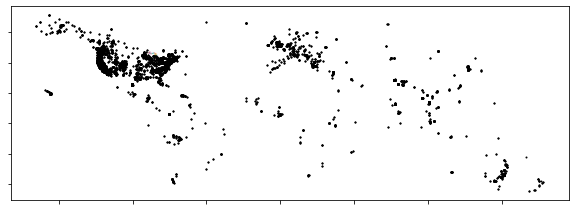

In [113]:
# Overlay points and Polygons
fig, ax = plt.subplots(figsize=(10,10))
gdf2.plot(ax=ax, column='NAME');
#ax.margins(-.2, -.2)
ax.set_xticklabels([])
ax.set_yticklabels([])
gdf5.plot(ax=ax, markersize=1, color='black');